# Data Exploration for the Ford Gobike System
## by Leleji Godwin Lucky

## Introduction
Ford GoBike is a bike share system that is managed by Motivate. They are electric bikes that makes transportation convenient, healthy, affordable and a fun experience. In addition to combating the problem of global warming, unnecessary traffic congestions in cities, bike share systems holds enermous potentials to change the future of within-city transportation.

Motivate runs a fleet of specially designed electric bikes that are locked into a network of docking stations. Bikes can be unlocked from one station and returned to any other station in the system. People use bike share to commute to work or school, run errands, get to appointments, and more.

This particular dataset contains information of Rides collected in 2019. It consists of 183412 rides. The features of the dataset includes - the duration of each ride in seconds, start and end time of each ride, basic information about the start and end station of the bikes, bike ID, member birth year and gender, etc.

For this analysis, I will be working with quite a number of the variables that I consider relevant in predicting the duration for a ride:
- duration_sec: The duration in seconds for each ride.
- start_time: The start time for the ride.
- end_time: The end time for the ride.
- start_station_id: An ID represensenting the station from which the bike embarked.
- start_stattion_name: The name of the start station.	
- end_station_id: An ID represensenting the station where the bike stopped.
- end_station_name: The name of the end station.
- bike_id: A unique ID for each bike.
- user_type  (Customer or Subscriber): Subscription status of each user. Users could subscribe to the service or Customers.	
- member_birth_year: Year of birth of the Rider.	
- member_gender: Gender of the Rider.
- bike_share_for_all_trip: indicates if the Rider is enrolled in the Bike Share for All program

I will focus on the importance of each of these variable in predicting the duration for each ride.
- Dependent variable - duration_sec
- Independent variable - other variables in the dataset.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

In [2]:
# Load in the dataset and have a preview

ford_gobike = pd.read_csv('201902-fordgobike-tripdata.csv')
ford_gobike.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
151851,331,2019-02-06 16:54:05.2330,2019-02-06 16:59:36.8400,222.0,10th Ave at E 15th St,37.792714,-122.248780,224.0,21st Ave at International Blvd,37.784855,-122.239305,4488,Subscriber,1977.0,Male,No
17754,2099,2019-02-26 20:18:23.7010,2019-02-26 20:53:23.5310,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,349.0,Howard St at Mary St,37.781010,-122.405666,4653,Subscriber,1992.0,Male,No
8184,189,2019-02-28 08:37:46.7840,2019-02-28 08:40:55.9380,70.0,Central Ave at Fell St,37.773311,-122.444293,72.0,Page St at Scott St,37.772406,-122.435650,545,Subscriber,1986.0,Male,No
130464,860,2019-02-09 17:11:17.1720,2019-02-09 17:25:37.7180,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,368.0,Myrtle St at Polk St,37.785434,-122.419622,3721,Subscriber,1987.0,Male,No
163302,905,2019-02-05 09:18:32.0640,2019-02-05 09:33:37.3520,90.0,Townsend St at 7th St,37.771058,-122.402717,58.0,Market St at 10th St,37.776619,-122.417385,4554,Subscriber,1995.0,Male,No


In [3]:
ford_gobike.shape

(183412, 16)

In [4]:
# Get basic information about the Dataset

ford_gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
# Check for null values in the dataset

ford_gobike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# Check to see if there are interesting patterns in the enteries with null values
# Missing values in start_station_id,start_station_name, end_station_id, and  end_station_name appears to have the same amount, 
# they must represent the same set of bike trips. Let's confirm that to be sure.
# Check the dataframe of enteries with 

ford_gobike[ford_gobike['start_station_id'].isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
6214,1334,2019-02-28 10:32:47.9300,2019-02-28 10:55:02.0280,NaN,NaN,37.40,-121.93,NaN,NaN,37.38,-121.93,4150,Customer,1990.0,Male,No
8499,240,2019-02-28 08:23:07.0920,2019-02-28 08:27:07.2890,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.95,4283,Subscriber,1988.0,Male,No
8783,883,2019-02-28 07:58:07.3720,2019-02-28 08:12:51.2760,NaN,NaN,37.41,-121.96,NaN,NaN,37.40,-121.94,4211,Subscriber,1980.0,Male,No
10967,116,2019-02-27 19:25:57.0360,2019-02-27 19:27:54.0260,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.95,4283,Subscriber,1988.0,Male,No
11071,828,2019-02-27 19:03:14.6380,2019-02-27 19:17:03.4340,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4091,Subscriber,1980.0,Male,No


As we can observe from the result above, values with nulls in the start and end stations represent the same trips. We'll take care of that subsequently.

In [7]:
# Trying to detect patterns in the enteries with null values
# Check using the member_gender variable

ford_gobike[ford_gobike['start_station_id'].isna()].member_gender.value_counts()

Male      151
Female     39
Other       5
Name: member_gender, dtype: int64

As we can see, enteries with null values are not found in one particular gender, they are spread accross all genders. This is plainly missing values and does not represent any pattern

In [8]:
# Trying to detect patterns in the enteries with null values
# Check using the user_type variable

ford_gobike[ford_gobike['start_station_id'].isna()].user_type.value_counts()

Subscriber    130
Customer       67
Name: user_type, dtype: int64

In [9]:
# Missing values in member_birth_year, and  member_gender happens to be the same, 
# they must represent the same set of bike trips. Let's confirm that to be sure.
# Check the dataframe of enteries with 

ford_gobike[ford_gobike['member_gender'].isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
147,372,2019-02-28 22:46:19.1140,2019-02-28 22:52:31.4770,369.0,Hyde St at Post St,37.787349,-122.416651,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,2191,Customer,NaN,NaN,No
176,730,2019-02-28 22:28:50.5140,2019-02-28 22:41:00.8970,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,258.0,University Ave at Oxford St,37.872355,-122.266447,4784,Customer,NaN,NaN,No
220,1425,2019-02-28 22:05:25.5530,2019-02-28 22:29:11.1180,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,109.0,17th St at Valencia St,37.763316,-122.421904,6525,Subscriber,NaN,NaN,No
266,1302,2019-02-28 21:53:13.2740,2019-02-28 22:14:56.1730,181.0,Grand Ave at Webster St,37.811377,-122.265192,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,2471,Customer,NaN,NaN,No
292,1468,2019-02-28 21:43:04.3630,2019-02-28 22:07:32.6640,321.0,5th St at Folsom,37.780146,-122.403071,29.0,O'Farrell St at Divisadero St,37.782405,-122.439446,6040,Customer,NaN,NaN,No


In [10]:
# Trying to detect patterns in the enteries with null values

ford_gobike[ford_gobike['member_gender'].isna()].user_type.value_counts()

Subscriber    5028
Customer      3237
Name: user_type, dtype: int64

All enteries with missing values are coincidental as there is no pattern observed.

In [11]:
ford_gobike[ford_gobike['start_station_id'].isna()].member_gender.value_counts()

Male      151
Female     39
Other       5
Name: member_gender, dtype: int64

In [12]:
# Get number of unique stations

ford_gobike.start_station_name.nunique()

329

In [13]:
# Get number of unique stations

ford_gobike.start_station_id.nunique()

329

In [14]:
# Get number of unique stations

ford_gobike.end_station_name.nunique()

329

In [15]:
# Get number of unique stations

ford_gobike.start_station_id.nunique()

329

In [16]:
# Get number of unique bikes

ford_gobike.bike_id.nunique()

4646

In [17]:
# Ascertain the validity of the values in the user_type variable

ford_gobike.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [18]:
# Ascertain the validity of the values in the bike_share_for_all_trip variable

ford_gobike.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [19]:
ford_gobike.duplicated().sum()

0

## Observations and Data Cleaning Steps

Having carefully gone through each of the variables in the dataset, the following observations were made:
- There are 329 stations in total represented in this dataset
- There are 4,646 bikes in total in this analysis.
- Customers are segmented as expected - Customer and Subscriber
- The rows having null values showed no pattern or similarities, they are simply missing values.
- The rows having nulls are such that we cannot perform any reasonable imputations for their values and be correct. We are better off just dropping these rows since they represent only a small percentage of the entire dataset and we do not have any reliable means of getting the data or perform some form ofimputation.

With the observations above, I am going to perform the following wrangling activities on the dataset:

- drop rows with nulls
- remove information about geographic location, i.e., start_station_latitude, start_station_longitude, end_station_latitude, - end_station_longitude 
- change start time and end time variables from object to datetime, and extract all the necessary information such as day of the week and month of the year.
- Get the Rider's age from the birth year info
- change start_station_id and end_station_id from float datatype to string.
- change bike_id from float to string
- change user_type and bike_share_for_all_trip to categorical type since there's an implied order
- extract the age of the rider from the birth year and change member_birth_year from float to int


## Data Cleaning
### Make a copy of the Dataset 

In [20]:
# Copy the dataset

ford_gobike_clean = ford_gobike.copy()

### Remove Enteries With Null Values

In [21]:
# Drop enteries with null values
ford_gobike_clean.dropna(inplace=True)

In [22]:
ford_gobike_clean.shape

(174952, 16)

In [23]:
ford_gobike_clean.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

### Select a Subset of the Dataset that We Want to Work With

In [24]:
ford_gobike_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [25]:
# grab a subset of the dataset that we want to work with

cols = ['duration_sec', 'start_time', 'end_time', 'start_station_id','start_station_name',  'end_station_id', 
        'end_station_name', 'bike_id', 'user_type','member_birth_year', 'member_gender', 'bike_share_for_all_trip']
ford_gobike_clean = ford_gobike_clean[cols]

In [26]:
ford_gobike_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip'],
      dtype='object')

### Change start time and end time variables from object to datetime

> - In the next couple of steps, I am going to extract all the necessary information from the start_time and start_end.
> - variables. In addition, I'd like the ride duration to be in minutes.
> - Also, the age of the Rider will be extracted from the member_birth_year information provided.

In [27]:
# Change start and end time variables from object type to datetime

ford_gobike_clean['start_time'] = pd.to_datetime(ford_gobike_clean['start_time'])
ford_gobike_clean['end_time'] = pd.to_datetime(ford_gobike_clean['end_time'])
ford_gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(3), int64(2), object(5)
memory usage: 17.4+ MB


### Extracting Relevant Variables from Start Time Variable

In [28]:
# Check maximum duration a bike was rented

print(f'{ford_gobike_clean.duration_sec.max()/3600} hours')

23.485555555555557 hours


In [29]:
# Let us quickly extract specific info such as day of the week, and month from the respective datetime objects
# We extract those info only from the start time since as we saw from above, it's less likely that a person
# rents a bike for more than a day

ford_gobike_clean['start_month_name'] = ford_gobike_clean['start_time'].dt.strftime('%B')
ford_gobike_clean['start_weekday'] = ford_gobike_clean['start_time'].dt.strftime('%a')
ford_gobike_clean['time_of_day'] = ford_gobike_clean['start_time'].dt.hour

In [30]:
ford_gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 15 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_month_name           174952 non-null object
start_weekday              174952 non-null object
time_of_day                174952 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(3), object(7)
memory usage: 21.4+ MB


In [31]:
ford_gobike_clean['start_time'].dt.year.unique()

array([2019])

Very good. Our dataset contains only the relevant enteries.

### Extract Age of Rider from the Birth Year Variable

In [32]:
# Extract riders' ages from member_birth_year variable
# Minutes are better understood than seconds; convert duration_sec to minutes

ford_gobike_clean['riders_age'] = (2019 - ford_gobike_clean['member_birth_year']).astype(int)
ford_gobike_clean['ride_duration'] = round(ford_gobike_clean['duration_sec']/60)
ford_gobike_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month_name,start_weekday,time_of_day,riders_age,ride_duration
71232,759,2019-02-19 17:34:46.164,2019-02-19 17:47:26.140,130.0,22nd St Caltrain Station,27.0,Beale St at Harrison St,6400,Subscriber,1986.0,Female,No,February,Tue,17,33,13.0
96696,498,2019-02-15 09:53:42.352,2019-02-15 10:02:00.736,220.0,San Pablo Ave at MLK Jr Way,163.0,Lake Merritt BART Station,4787,Subscriber,1977.0,Male,No,February,Fri,9,42,8.0
132707,733,2019-02-08 22:40:14.881,2019-02-08 22:52:28.873,345.0,Hubbell St at 16th St,368.0,Myrtle St at Polk St,5299,Subscriber,1992.0,Male,No,February,Fri,22,27,12.0
80347,506,2019-02-18 15:47:44.731,2019-02-18 15:56:11.153,73.0,Pierce St at Haight St,120.0,Mission Dolores Park,5444,Customer,1993.0,Female,No,February,Mon,15,26,8.0
71130,251,2019-02-19 17:47:41.263,2019-02-19 17:51:52.971,238.0,MLK Jr Way at University Ave,255.0,Virginia St at Shattuck Ave,4642,Subscriber,1996.0,Female,No,February,Tue,17,23,4.0


In [33]:
ford_gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_month_name           174952 non-null object
start_weekday              174952 non-null object
time_of_day                174952 non-null int64
riders_age                 174952 non-null int64
ride_duration              174952 non-null float64
dtypes: datetime64[ns](

### Change Start and End Station ID to String

In [34]:
# Change start_station_id, end_station_id, bike_id from floats and int to string types

ford_gobike_clean['start_station_id'] = ford_gobike_clean['start_station_id'].astype(str)
ford_gobike_clean['end_station_id'] = ford_gobike_clean['end_station_id'].astype(str)
ford_gobike_clean['bike_id'] = ford_gobike_clean['bike_id'].astype(str)

In [35]:
ford_gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
end_station_id             174952 non-null object
end_station_name           174952 non-null object
bike_id                    174952 non-null object
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_month_name           174952 non-null object
start_weekday              174952 non-null object
time_of_day                174952 non-null int64
riders_age                 174952 non-null int64
ride_duration              174952 non-null float64
dtypes: datetime64[ns](2

### Change User Type and Bike Share For All Variables to Categorical

In [36]:
ford_gobike_clean['bike_share_for_all_trip'].value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

In [37]:
# Change user_type and bike_share_for_all_trip from object to categorical types

user_types = ['Subscriber', 'Customer']
bike_share_for_all_trip_types = ['Yes', 'No']

user_type_categories = pd.api.types.CategoricalDtype(ordered=True, categories=user_types)
ford_gobike_clean['user_type'] = ford_gobike_clean['user_type'].astype(user_type_categories)

bike_share_for_all_trip_categories = pd.api.types.CategoricalDtype(ordered=True, categories=bike_share_for_all_trip_types)
ford_gobike_clean['bike_share_for_all_trip'] = ford_gobike_clean['bike_share_for_all_trip'].astype(bike_share_for_all_trip_categories)

In [38]:
ford_gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
end_station_id             174952 non-null object
end_station_name           174952 non-null object
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null category
start_month_name           174952 non-null object
start_weekday              174952 non-null object
time_of_day                174952 non-null int64
riders_age                 174952 non-null int64
ride_duration              174952 non-null float64
dtypes: category(2),

In [39]:
# Let's remove the columns that we will not be needing anymore, since we have derived the necessary information from them

ford_gobike_clean.drop(['duration_sec', 'start_time', 'end_time', 'member_birth_year'], axis=1, inplace=True)
ford_gobike_clean.head()

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,start_month_name,start_weekday,time_of_day,riders_age,ride_duration
0,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,February,Thu,17,35,870.0
2,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,February,Thu,12,47,1031.0
3,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,Other,No,February,Thu,17,30,608.0
4,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,Male,Yes,February,Thu,23,45,26.0
5,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,Male,No,February,Thu,23,60,30.0


In [40]:
ford_gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 13 columns):
start_station_id           174952 non-null object
start_station_name         174952 non-null object
end_station_id             174952 non-null object
end_station_name           174952 non-null object
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null category
start_month_name           174952 non-null object
start_weekday              174952 non-null object
time_of_day                174952 non-null int64
riders_age                 174952 non-null int64
ride_duration              174952 non-null float64
dtypes: category(2), float64(1), int64(2), object(8)
memory usage: 16.4+ MB


## Let's carry out additional house keeping on our variables to be double sure

In [41]:
ford_gobike_clean['start_station_name'].nunique() == ford_gobike_clean['end_station_name'].nunique()

True

In [42]:
ford_gobike_clean['start_station_id'].nunique() == ford_gobike_clean['end_station_id'].nunique()

True

In [43]:
ford_gobike_clean['bike_id'].nunique()

4607

In [44]:
ford_gobike_clean.duplicated().sum()

10

Hmmm, now we have a couple of duplicates in our dataset. We'll drop them in the next round of additional data cleaning.

In [45]:
ford_gobike_clean['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [46]:
ford_gobike_clean['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [47]:
ford_gobike_clean['bike_share_for_all_trip'].value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

In [48]:
ford_gobike_clean['start_month_name'].value_counts()

February    174952
Name: start_month_name, dtype: int64

Interesting! Turns out the dataset is for February 2019 alone. The start_month_name coulmn wouldn't provide us with much information. We have to drop the column.

In [49]:
ford_gobike_clean['start_weekday'].value_counts()

Thu    33712
Tue    30584
Wed    28426
Fri    27663
Mon    25641
Sun    14512
Sat    14414
Name: start_weekday, dtype: int64

In [50]:
ford_gobike_clean['time_of_day'].value_counts()

17    20904
8     20227
18    16118
9     15204
16    13473
7     10231
19     9424
15     8646
12     8220
13     8098
10     7970
14     7677
11     7461
20     6211
21     4400
6      3293
22     2793
23     1572
0       893
5       866
1       525
2       355
4       227
3       164
Name: time_of_day, dtype: int64

In [51]:
print(ford_gobike_clean['riders_age'].min()), print(ford_gobike_clean['riders_age'].max())

18
141


(None, None)

In [52]:
ford_gobike_clean.query('riders_age > 75').shape[0]

263

Turns out some ages are way more than expected. Let's cap our Riders' age at 75.

In [53]:
print(ford_gobike_clean['ride_duration'].min()), print(ford_gobike_clean['ride_duration'].max())

1.0
1409.0


(None, None)

In [54]:
ford_gobike_clean.query('ride_duration < 1').shape[0]

0

That's also interesting. All the ride duration are in range.

## Additional Data Cleaning Steps

1. Remove enteries with unrealistic ages
2. Drop column start_month_name
3. Drop columns start_station_id and end_station_id.
4. Bike_id too does not seem to provide us with relevant information, we drop it.

In [55]:
# remove rows with unrealistic ages

ford_gobike_clean = ford_gobike_clean.query('riders_age <= 75')

In [56]:
ford_gobike_clean.query('riders_age > 75').shape[0]

0

In [57]:
ford_gobike_clean.drop(['start_month_name', 'bike_id', 'start_station_id', 'end_station_id'], axis=1, inplace=True)
ford_gobike_clean.columns

Index(['start_station_name', 'end_station_name', 'user_type', 'member_gender',
       'bike_share_for_all_trip', 'start_weekday', 'time_of_day', 'riders_age',
       'ride_duration'],
      dtype='object')

In [58]:
ford_gobike_clean.head(3)

,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,start_weekday,time_of_day,riders_age,ride_duration
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,Thu,17,35,870.0
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,No,Thu,12,47,1031.0
3,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,Other,No,Thu,17,30,608.0


In [59]:
ford_gobike_clean.duplicated().sum()

7265

We seem to now have some duplicate data

In [60]:
# Drop duplicates
ford_gobike_clean.drop_duplicates(inplace=True)

In [61]:
ford_gobike_clean.duplicated().sum()

0

In [62]:
ford_gobike_clean.isnull().sum()

start_station_name         0
end_station_name           0
user_type                  0
member_gender              0
bike_share_for_all_trip    0
start_weekday              0
time_of_day                0
riders_age                 0
ride_duration              0
dtype: int64

In [63]:
ford_gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167424 entries, 0 to 183411
Data columns (total 9 columns):
start_station_name         167424 non-null object
end_station_name           167424 non-null object
user_type                  167424 non-null category
member_gender              167424 non-null object
bike_share_for_all_trip    167424 non-null category
start_weekday              167424 non-null object
time_of_day                167424 non-null int64
riders_age                 167424 non-null int64
ride_duration              167424 non-null float64
dtypes: category(2), float64(1), int64(2), object(4)
memory usage: 10.5+ MB


In [64]:
ford_gobike_clean.describe()

,time_of_day,riders_age,ride_duration
count,167424.000000,167424.000000,167424.000000
mean,13.521699,34.115199,11.815779
std,4.722447,9.830212,27.659828
min,0.000000,18.000000,1.000000
25%,9.000000,27.000000,5.000000
50%,14.000000,32.000000,9.000000
75%,17.000000,39.000000,13.000000
max,23.000000,75.000000,1409.000000


In [65]:
ford_gobike_clean.shape

(167424, 9)

### Save the Cleaned Dataset

Before we go ahead with our analysis, let's go ahead to save our cleaned dataset

In [66]:
ford_gobike_clean.to_csv('ford_gobike_clean.csv', index=False)

## Structure of the Cleaned Dataset

> The dataset now has 167,424 enteries with 9 variables
> 1. start_station_name (string): The name of the start station.
> 2. end_station_name (string): The name of the end station.
> 3. user_type (categorical): The type of user - Customer or Subscriber.
> 4. member_gender (string): Gender of the user.
> 5. bike_share_for_all_trip (categorical): Boolean value indicating if user is enrolled in Bike for All program.
> 6. start_weekday (string): Day of the week when bike was hired.
> 7. time_of_day (string): Time of the day when bike was hired.
> 8. riders_age (int): The age of the Rider.
> 9. ride_duration (float): The duration in minutes that bike was hired

## Main Feature of Interest in the Dataset?

> My main features of interest is the ride duration. I want to investigate what makes for longer duration when bike share services are used. This will help us to drive profit, because longer rides translates to more money for the business. It can also help to inform advert decisions.

## Features in the Dataset that will help support my Investigation 

> Basically I will explore all the features in the dataset to know the ones that will provide insight into my variable of interest. I will then zero in on those variables that gives me the most information.

## Univariate Exploration

### How is the Ride Duration Distributed?

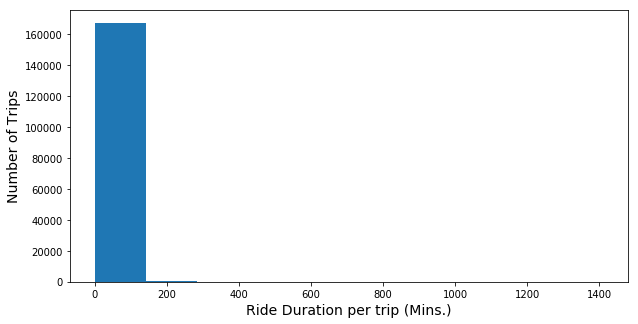

In [67]:
# plot a distribution of the ride duration

plt.figure(figsize=[10,5])

plt.hist(data=ford_gobike_clean, x='ride_duration');
plt.xlabel('Ride Duration per trip (Mins.)', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14);

It's obvious that the ride duration is heavily skewed to the right. There are very few large values. I will apply a log transformation on the data and plot the distribution again.

In [68]:
# perform a log transform on the ride duration variable

np.log10(ford_gobike_clean.ride_duration).describe()

count    167424.000000
mean          0.932650
std           0.306238
min           0.000000
25%           0.698970
50%           0.954243
75%           1.113943
max           3.148911
Name: ride_duration, dtype: float64

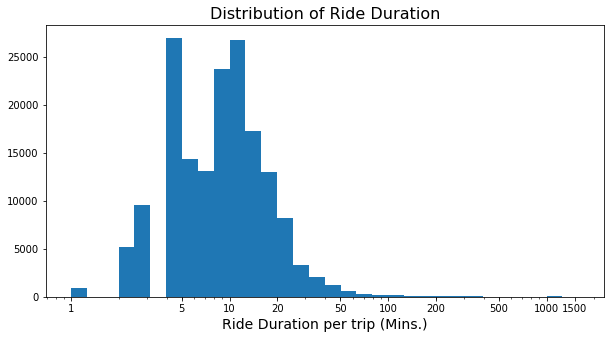

In [69]:
plt.figure(figsize=[10,5])

bins = 10**np.arange(0, 3.14+0.1, 0.1)
plt.hist(data=ford_gobike_clean, x='ride_duration', bins=bins);
plt.xscale('log')
ticklocs = [1, 5, 10, 20, 50, 100, 200, 500, 1000, 1500]
ticklabels = [str(v) for v in ticklocs]
plt.xlabel('Ride Duration per trip (Mins.)', fontsize=14)
plt.xticks(ticklocs, ticklabels)
plt.title('Distribution of Ride Duration', fontsize=16);

After trying a log transformation on the ride duration, we can see clearly that most of the trips are between 4 and 20 minutes long. Very few trips are above 30 minutes. The distribution has a very long tail towards the right indicating lower ride durations above an hour.

### Define a Log Transformation function 

In [70]:
# Define a function to perform log transformation

def log_transform(x, inverse=False):
    """
    This function will perform a logarithmic transformation on the input variable. The goal is to transform the data
    into a log-normal distributed data or back to it's original form.
    
    parameters:
    x - data to be transfromed
    inverse (boolean) - specify an inverse parameter to convert values back to their original form.
    
    Returns the common log of x or 10 raised to the power of x.
    """
    if not inverse:
        return np.log10(x)
    else:
        return 10**x

### Which Stations Have High and Low Traffic?

This visualization will need to be called in four different places, I define a function to do that below. First, I want to see which stations are the top start and stop stations, next, which stations are the bottom start and end stations.

In [71]:
# Define a function to plot bar charts.

def visualize_top_and_bottom(df, var, n=10, top=True, orient=True):
    """
    This function will plot a bar chart of the top or bottom n enteries.
    
    parameters:
    df       - The dataframe to plot from
    var      - column/variable to plot
    n        - The number of the values to plot
    top      - boolean value specifying whether to plot top n values or bottom n values
    orient   - switch x and y positions. Necessary for columns names that are very long.
    """
    color = sns.color_palette()[0]
    
    # plot bottom n values with categories on the x axis (plot vertical bar chart)
    if not top and not orient:    
        bottom_n_index = df[var].value_counts().index[-n:]   
        bottom_n_start_stations = df[df[var].isin(bottom_n_index)]
        order = bottom_n_start_stations[var].value_counts().index
        sns.countplot(data=bottom_n_start_stations, x=var, order=order, color=color)
        
    # plot bottom n values with the categories on the y axis (Horizontal bar chart)
    elif not top:    
        bottom_n_index = df[var].value_counts().index[-n:]   
        bottom_n_start_stations = df[df[var].isin(bottom_n_index)]
        order = bottom_n_start_stations[var].value_counts().index
        sns.countplot(data=bottom_n_start_stations, y=var, order=order, color=color)
    
    # Plot a vertical bar chart with top n values
    elif not orient:
        top_n_index = df[var].value_counts().index[:n]   
        top_n_start_stations = df[df[var].isin(top_n_index)]
        order = top_n_start_stations[var].value_counts().index
        sns.countplot(data=top_n_start_stations, x=var, order=order, color=color)
    
    # Plot a horizontal bar chart with top n values (default)
    else:
        top_n_index = df[var].value_counts().index[:n]   
        top_n_start_stations = df[df[var].isin(top_n_index)]
        order = top_n_start_stations[var].value_counts().index
        sns.countplot(data=top_n_start_stations, y=var, order=order, color=color)   

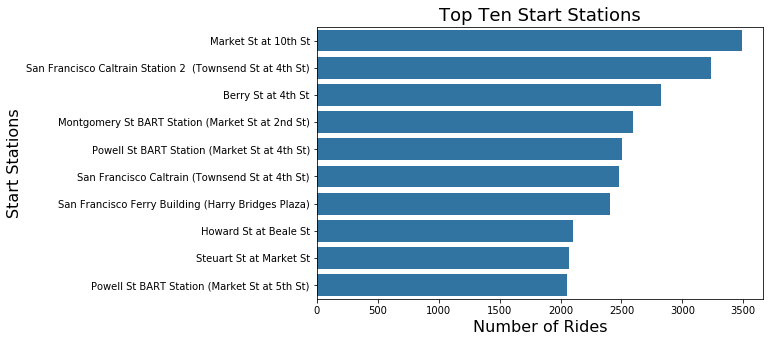

In [72]:
plt.figure(figsize=[8,5])
visualize_top_and_bottom(ford_gobike_clean, 'start_station_name')
plt.title('Top Ten Start Stations', fontsize=18)
plt.ylabel('Start Stations', fontsize=16)
plt.xlabel('Number of Rides', fontsize=16);

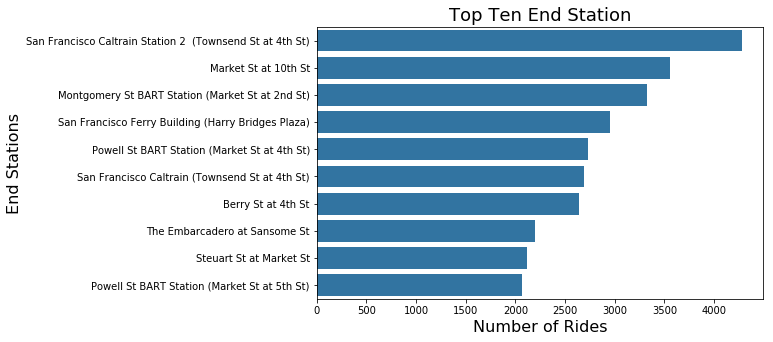

In [73]:
plt.figure(figsize=[8,5])
visualize_top_and_bottom(ford_gobike_clean, 'end_station_name')
plt.title('Top Ten End Station', fontsize=18)
plt.ylabel('End Stations', fontsize=16)
plt.xlabel('Number of Rides', fontsize=16);

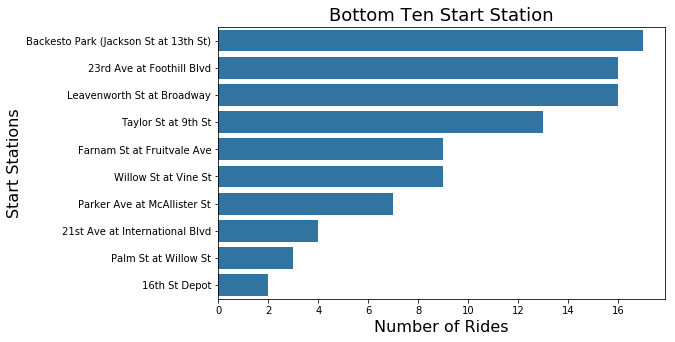

In [74]:
plt.figure(figsize=[8,5])
visualize_top_and_bottom(ford_gobike_clean, 'start_station_name', top=False)
plt.title('Bottom Ten Start Station', fontsize=18)
plt.ylabel('Start Stations', fontsize=16)
plt.xlabel('Number of Rides', fontsize=16);

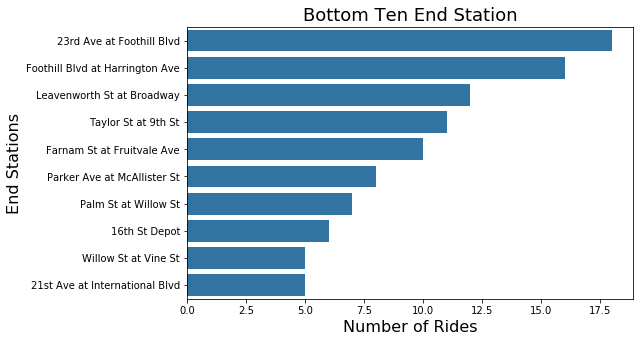

In [75]:
plt.figure(figsize=[8,5])
visualize_top_and_bottom(ford_gobike_clean, 'end_station_name', top=False)
plt.title('Bottom Ten End Station', fontsize=18)
plt.ylabel('End Stations', fontsize=16)
plt.xlabel('Number of Rides', fontsize=16);

The top ten start station, with only one exception, are also the top ten end stations.

With only one exception, we can see clearly that the bottom ten start stations are also the bottom ten end stations. 

### Utility Bar Chat functions

Since I am going to be viewing quite a number of distributions, I will need quite a number of bar chats. I will define two functions plot_categorical and plot_nominal.
plot_categorical will be used to plot bar charts where the data has an inherent or natural ordering. In plot_ordinal where there is no inherent ordering, we want to sort the bars according to height.

In [76]:
def plot_categorical(df, var, color = sns.color_palette()[0]):
    plt.figure(figsize=[8,5])
    sns.countplot(data=df, x=var, color=color);
    
def plot_nominal(df, var, color = sns.color_palette()[0]):
    plt.figure(figsize=[8,5])
    sns.countplot(data=df, x=var, color=color, order=df[var].value_counts().index);

### What is the Amount of Customers and Subscribers?

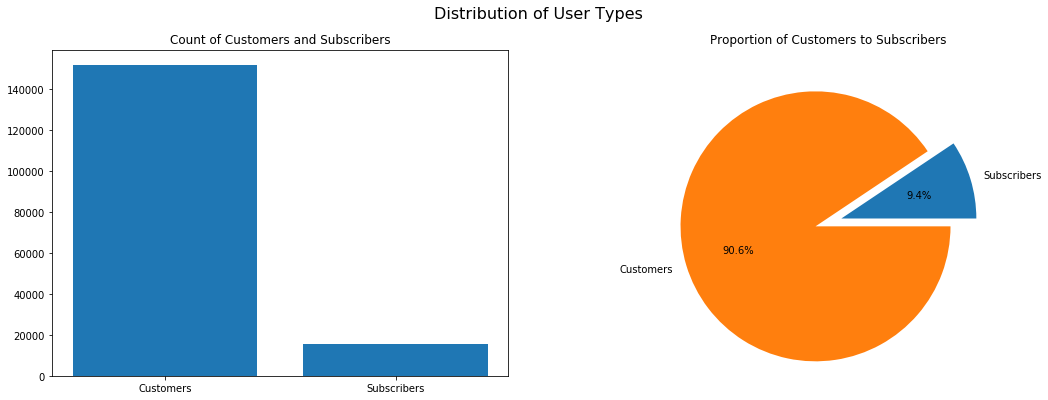

In [77]:
# Plot the proportion of Customers to Subscribers in a pie chart
customer_count = ford_gobike_clean.query('user_type == "Customer"')['ride_duration'].count()
subscriber_count = ford_gobike_clean.query('user_type == "Subscriber"')['ride_duration'].count()
customer_prop = (customer_count/ford_gobike_clean['ride_duration'].count()) *100
subscriber_prop = (subscriber_count/ford_gobike_clean['ride_duration'].count()) *100

plt.figure(figsize=[18, 6])
labels = ['Subscribers', 'Customers']

# Plot bar chart
plt.subplot(1,2,1)
plt.bar(labels, [customer_count, subscriber_count])
plt.title('Count of Customers and Subscribers')

# plot pie chart
plt.subplot(1,2,2)
plt.pie([customer_prop, subscriber_prop], explode=(0, 0.2), labels=labels, autopct='%1.1f%%')
plt.title('Proportion of Customers to Subscribers')
plt.axis('square');

plt.suptitle('Distribution of User Types', fontsize=16);

With more than 150,000 Subscribers, there are just about 20,000 Customers that used the service for the month of February. We are going to explore this trend more by viewing how this affects ride duration. In addition, we are going to explore if this high number of Subscribers have any relationship with being enrolled in the Bike Share for all Program. We will then turn this bivariate relationship into multivariate by seeing how they both affect ride duration.

### Which Gender uses Bike Share Services More in February?

There is no implied ordering between the male gender and female gender as implying that will be mysogynistic, we use the plot_nominal function here.

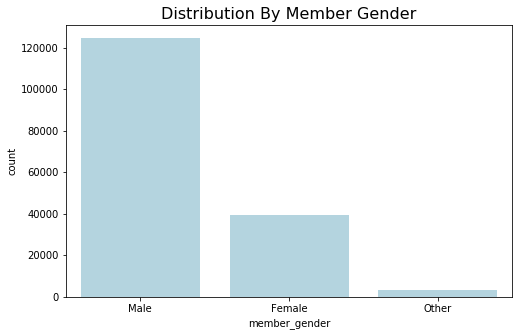

In [78]:
plot_nominal(ford_gobike_clean, 'member_gender', color='lightblue')
plt.title('Distribution By Member Gender', fontsize=16);

Turns out there are more male Riders than females.

### What Number of Trips in February are Bike Share For All Trips?

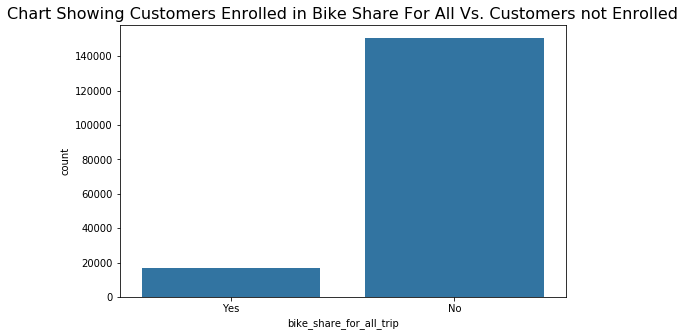

In [79]:
plot_categorical(ford_gobike_clean, 'bike_share_for_all_trip')
plt.title('Chart Showing Customers Enrolled in Bike Share For All Vs. Customers not Enrolled', fontsize=16);

It turns out out that most of the trips in February are not bike_share_for_all_trips. This means they cost more. We shall also explore how this affect ride duration.

### Which Day of the Week has Higher Number of Trips?

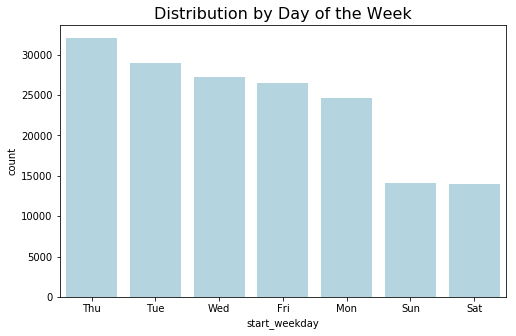

In [80]:
plot_nominal(ford_gobike_clean, 'start_weekday', color='lightblue')
plt.title('Distribution by Day of the Week', fontsize=16);

As expected, there are more rides on weekdays compared to weekends. In addition, the number of rides experienced steady decline as the weekdays wraps up into the weekend. We will also see how the ride duration vary between weekdays and weekends.

### At What Time of the Day Do We Have Higher Number of Trips?

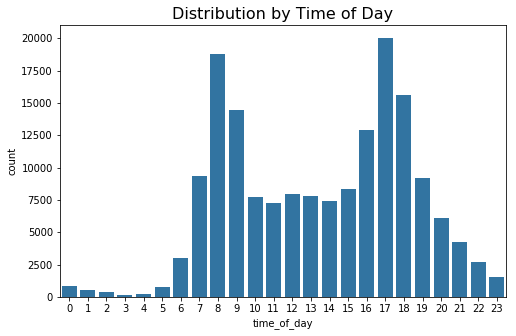

In [81]:
plot_categorical(ford_gobike_clean, 'time_of_day')
plt.title('Distribution by Time of Day', fontsize=16);

From the chart above, we can see that the number of rides increase as we move from the waking hours of the day and peaks at 8:00 am in the morning. A steady number of rides is observed as we approach noon and continues till 3:00 pm where it begins to rise steadily util it peaks again at 5:00 pm in the evening. A stedy decline is again observed afterwards.

The time of the day is a very important independent variable in this analysis, hence, I will revisit it again in both the bivariate and multivariate explorations.

### What is the Age Distribution of Riders?

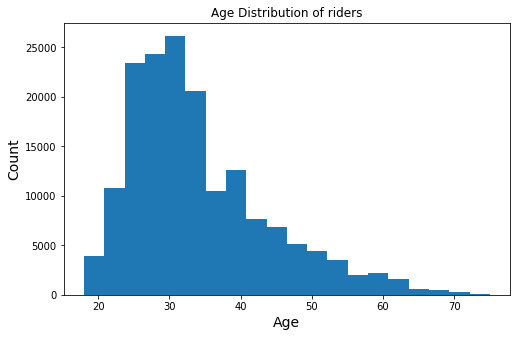

In [82]:
plt.figure(figsize=[8,5])
plt.hist(data=ford_gobike_clean, x='riders_age', bins=20);
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Age Distribution of riders');

We can see clearly that majority of the Riders are between ages 25 and 50. We shall examine how much this imacts the ride duration subsequently.

### Summary on the Variables of Interest

> The ride duration is mostly between 4 and 30 minutes. There are quite some high ride duration, but those are very few.

### Summary on Other Variables in the Dataset

> - The top 10 start stations is also the top 10 end stations. The same trend applies to the bottop start and stop stations.
> - There are more Subscribers than Customers.
> - More males use the service than females.
> - Majority of the trips are not bike share for all trips
> - There are more trips on weekdays than weekends.
> - Majority of the Riders are between ages 25 and 50 years old
> - There are two peak periods where the number of trips spikes - 8am and 5pm.

## Bivariate Exploration

> In this section, I investigate relationships between pairs of variables in the data. 

### How Does the Number of Trips Vary on Hourly Basis Accross Each Day?

Previously, in the univariate exploration of the number of trips accross each hour of the day, we observed that there is a daily spike in the number of trips at 8am and 5pm. Does this trend hold for everyday or simply for only weekdays. Since we infered previously that the spikes in the number of trips at 8am and 5pm could be as a result of people commuting to school or work, it makes sence to investigate if this pattern doesn't occur at weekends.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


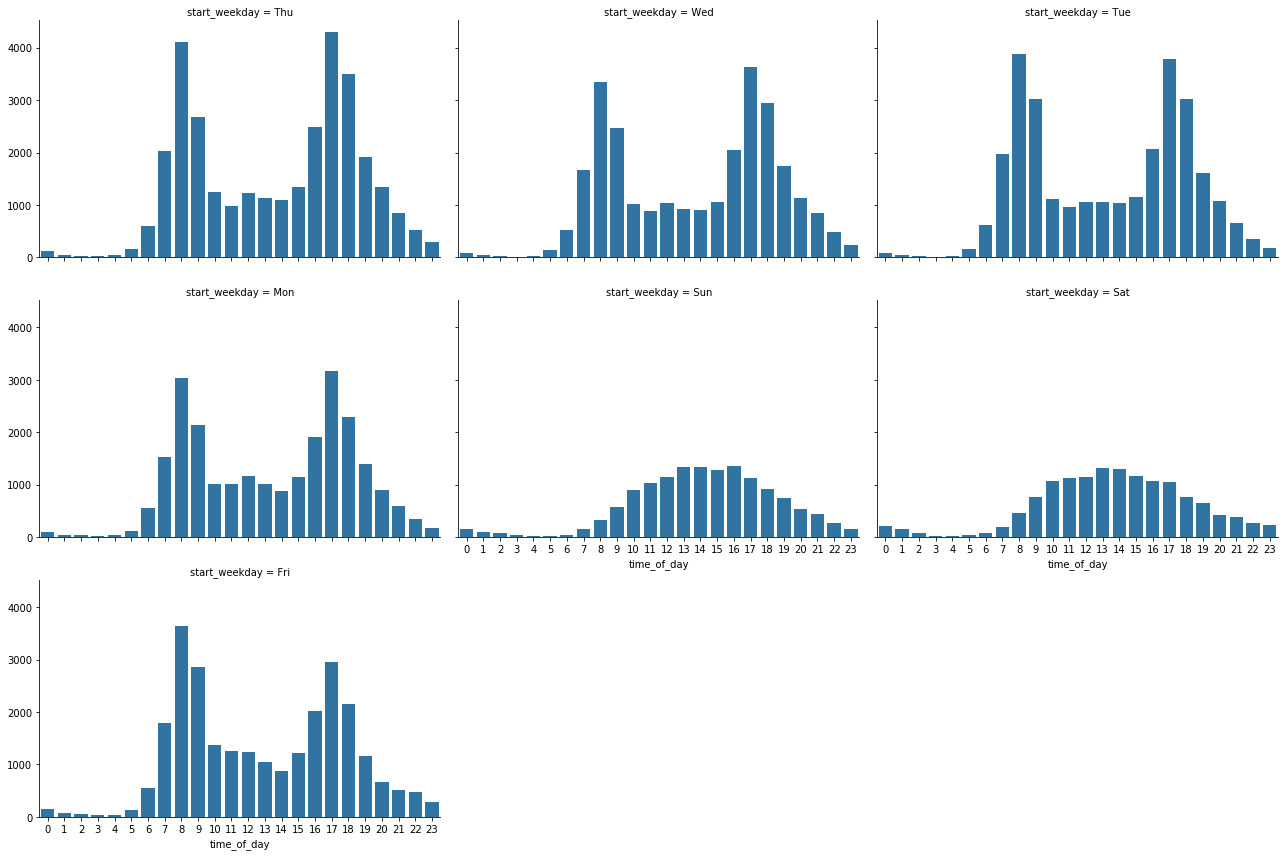

In [83]:
g = sns.FacetGrid(data=ford_gobike_clean, col='start_weekday', col_wrap=3, size=4, aspect=1.5)
g.map(sns.countplot, 'time_of_day');

We can see an interesting trend here. Each of the plots follow a similar pattern with the exception of weekends. The number of rides increases as the day brightens up and spikes at rush hours (7am to 9am), and then becomes steady for a while and spikes again at the evning rush hours (4pm to 6pm).

The number of rides at weekend on the other hand seems to follow what looks like a Gaussian distribution. The number of trips increases sequentially and peaks at noon. It becomes steady until 4pm and decreases gradually.

Intuitively, we can tell that the spikes in the morning are as a result of people using bike share services to commute to work or school. The spike in the evening also represent the same set of people commuting back from school or work. Since we are not given information on what users typically use the service for, either for recreation or as a means of commuting to work, it will be helpful to explore the trend of daily usage by Customer and Subscriber.

Let us proceed to see how this trend affects ride duration and not just the number of trips. There are a lot of possibilities that we could explore here:

First, what is the average ride duration for each day and each hour?
Secondly, Does the type of user have anything to do with the ride duration? 

Why would we need to ask the questions above?
We are ultimately interested in ride durations and not just the number of trips per day (although, this too is important). If we can make more money with fewer trips and longer durations, we want to then know the class of users that make fewer trips but with longer durations.

Let us explore the average ride duration accross each day and each hour next.

### Exploring Relationship Between Day of the Week and Ride Duration

### Adding Variable to the Dataset
Since ride_duration is my variable of interest, I'll be making use of it quite frequently. For some plots to be rendered correctly, I will have to plot the transformed ride_duration against some other variables. It makes sense to add a column to the dataframe. This column will hold the log transformed ride_duration so that we can use it directly rather than calling our log_transform function all the time.

In [84]:
ford_gobike_clean.head(3)

,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,start_weekday,time_of_day,riders_age,ride_duration
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,Thu,17,35,870.0
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,No,Thu,12,47,1031.0
3,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,Other,No,Thu,17,30,608.0


In [85]:
ford_gobike_clean['ride_duration_log'] = ford_gobike_clean['ride_duration'].apply(log_transform)
ford_gobike_clean.head(3)

,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,start_weekday,time_of_day,riders_age,ride_duration,ride_duration_log
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,Thu,17,35,870.0,2.939519
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,No,Thu,12,47,1031.0,3.013259
3,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,Other,No,Thu,17,30,608.0,2.783904


### Mean Ride Duration by Day of the Week

In [86]:
ford_gobike_clean.groupby('start_weekday')['ride_duration'].mean()

start_weekday
Fri    11.472140
Mon    11.718627
Sat    13.943128
Sun    14.123431
Thu    11.434804
Tue    11.057343
Wed    11.202598
Name: ride_duration, dtype: float64

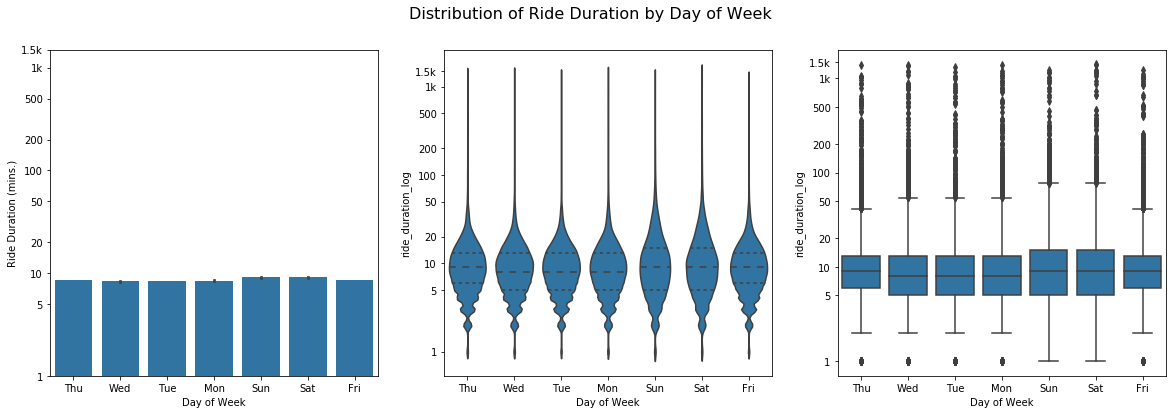

In [87]:
plt.figure(figsize=[20,6])
log_ticks = np.log10([1, 5, 10, 20, 50, 100, 200, 500, 1000, 1500])
log_labels = ['1', '5', '10', '20', '50', '100', '200', '500', '1k', '1.5k']
base_color = sns.color_palette()[0]

plt.subplot(1,3,1)
sns.barplot(data=ford_gobike_clean, x='start_weekday', y='ride_duration_log', color=base_color);
plt.yticks(log_ticks, log_labels)
plt.ylabel('Ride Duration (mins.)')
plt.xlabel('Day of Week');

plt.subplot(1,3,2)
sns.violinplot(data=ford_gobike_clean, x='start_weekday', y='ride_duration_log', color=base_color, inner='quartile');
plt.yticks(log_ticks, log_labels)
plt.xlabel('Day of Week')

plt.subplot(1,3,3)
sns.boxplot(data=ford_gobike_clean, x='start_weekday', y='ride_duration_log', color=base_color);
plt.yticks(log_ticks, log_labels)
plt.xlabel('Day of Week')
plt.suptitle('Distribution of Ride Duration by Day of Week', fontsize=16);

Pretty instructive. Recall from the univariate exploration that weekends have the lowest amount of trips. From the plots above, we discover that irrespective of the numper of trips per day, mean ride duration is almost the same for everyday. In fact, mean ride duration for weekends are higher than weekdays.

This could mean that while there are few trip in the weekends, these trips tend to span longer durations. Of course these trips could be for recreational activities as opposed to commutting purposes. A trend begins to come to mind here. Weekday trips are more and span shorter durations while weekend trips are fewer and span longer durations.

Let's see how this trend play out accross each hour of the day.

### What is the Mean Ride Duration for Each Hour of Each Day?

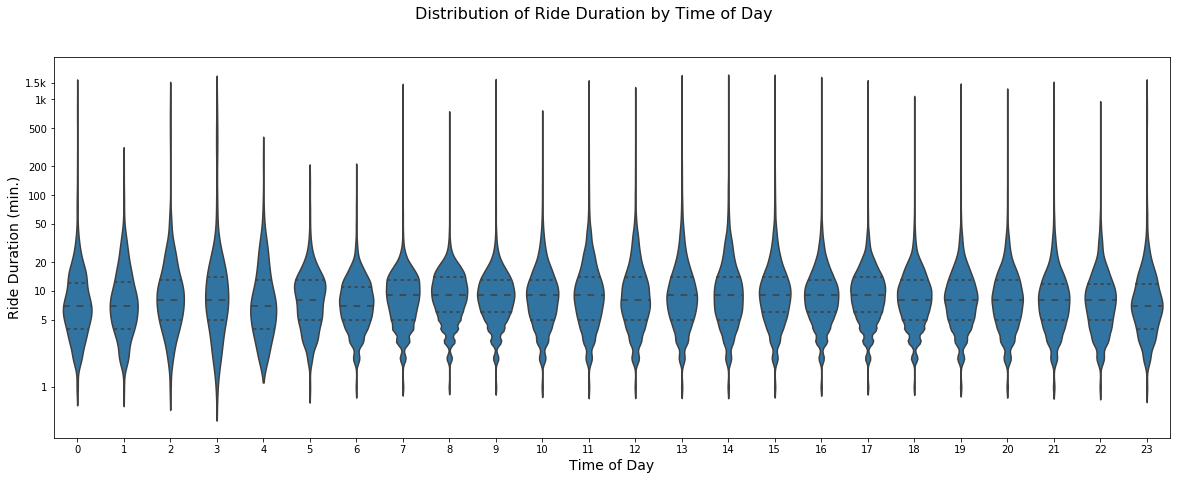

In [88]:
plt.figure(figsize=[20,7])

sns.violinplot(data=ford_gobike_clean, x='time_of_day', y='ride_duration_log', color=base_color, inner='quartile');
plt.yticks(log_ticks, log_labels)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Ride Duration (min.)',  fontsize=14)
plt.suptitle('Distribution of Ride Duration by Time of Day', fontsize=16);

Well, I'm not surprised. The pattern is becoming pretty obvious. In the univariate explorations we saw that the number of trips on weekdays are higher than weekends. This difference doesn't translate to an increase in ride duration. We also saw in the univariate exploration that the number of trips at rush hours (7am - 9am & 4pm - 6pm) are very high. This also does not translate to increase in ride duration.

One observation that we have made is that there are more shorter trips and fewer longer trips.

It will make sense to see how this relationship play out with the user types.

### Exploring Relationship Between Ride Duration and User Type

Who uses the service for longer periods between Customers and Subscribers?

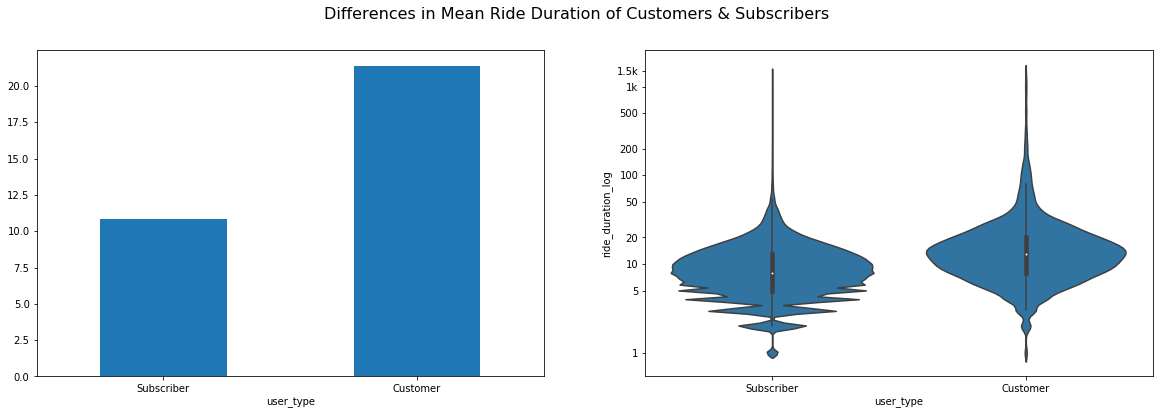

In [89]:
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
ford_gobike_clean.groupby('user_type')['ride_duration'].mean().plot(kind='bar', color=base_color)
plt.xticks(rotation=0);

plt.subplot(1,2,2)
sns.violinplot(data=ford_gobike_clean, x='user_type', y='ride_duration_log', color=base_color);
plt.yticks(log_ticks, log_labels)
plt.suptitle('Differences in Mean Ride Duration of Customers & Subscribers', fontsize=16);

In [90]:
ford_gobike_clean.user_type.value_counts()

Subscriber    151703
Customer       15721
Name: user_type, dtype: int64

Now we are begining to get the picture clearer. It turns out that Customers use the the service 2x longer than the duration that Subscribers use the service.

If we make an assumption that Recreational Cyclists tend to use the service for 60 minutes and more, we may come to find out that most Customers are Recreational Cyclists while most Subscribers fall into the category of those using the service for commutting purposes.

However, before we dig into that, let's begin to confirm our intuition by trying to see how ride duration compares accross weekdays and weekends.

### Distribution by User Type

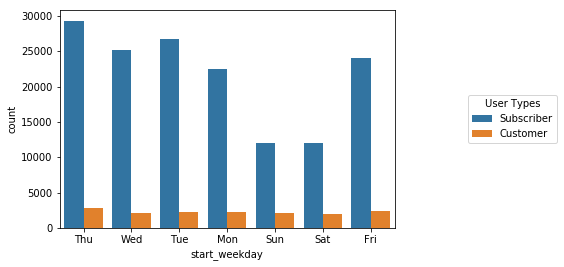

In [91]:
sns.countplot(data=ford_gobike_clean, x='start_weekday', hue='user_type');
plt.legend(loc="center right", bbox_to_anchor=(1.5, 0.5), title='User Types');

Well, I'm not surprised. There are obviously about 10x more Subscribers than Customers.  Our focus here is how they compare based on the day of the week. I can observe that it appears that the count of Customers on Sunday is higher than about two other days. Let us zoom in on this more closely.

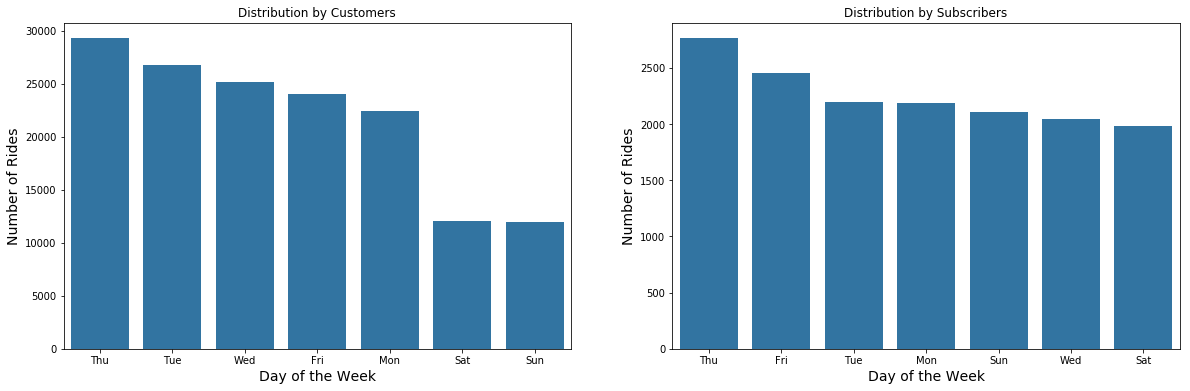

In [125]:
ford_gobike_clean_sub = ford_gobike_clean[ford_gobike_clean['user_type'] == 'Subscriber']
ford_gobike_clean_cust = ford_gobike_clean[ford_gobike_clean['user_type'] == 'Customer']

plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
sub_order = ford_gobike_clean_sub.start_weekday.value_counts().index
sns.countplot(x='start_weekday', data=ford_gobike_clean_sub, color=base_color, order=sub_order)
plt.title('Distribution by Customers')
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)

plt.subplot(1,2,2)
cust_order = ford_gobike_clean_cust.start_weekday.value_counts().index
sns.countplot(x='start_weekday', data=ford_gobike_clean_cust, color=base_color, order=cust_order);
plt.title('Distribution by Subscribers')
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14);

The distinction between both plots confirms that while Subscribers use the service mostly on weekdays as perjaps their primary means of commutting to work or school, Customers are likely Recreational Cyclists or hobbyists.

Finally on the time of the day and day of the week, let's see how the number of trips is influenced by the user type 

### Do Customers Use the Service More Than Subscribers During Peak Hours?

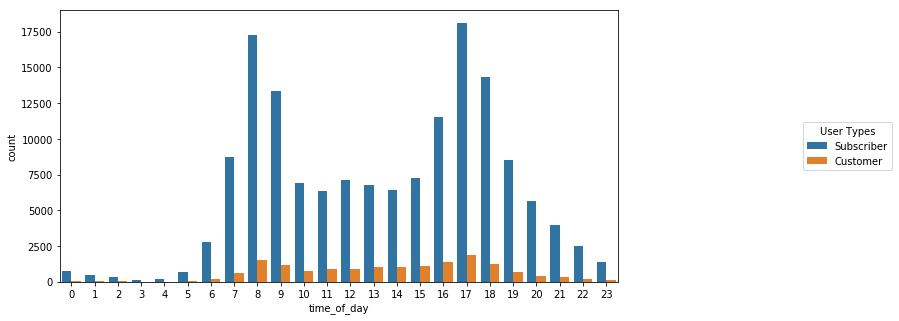

In [93]:
plt.figure(figsize=[10, 5])
sns.countplot(data=ford_gobike_clean, x='time_of_day', hue='user_type');
plt.legend(loc="center right", bbox_to_anchor=(1.5, 0.5), title='User Types');

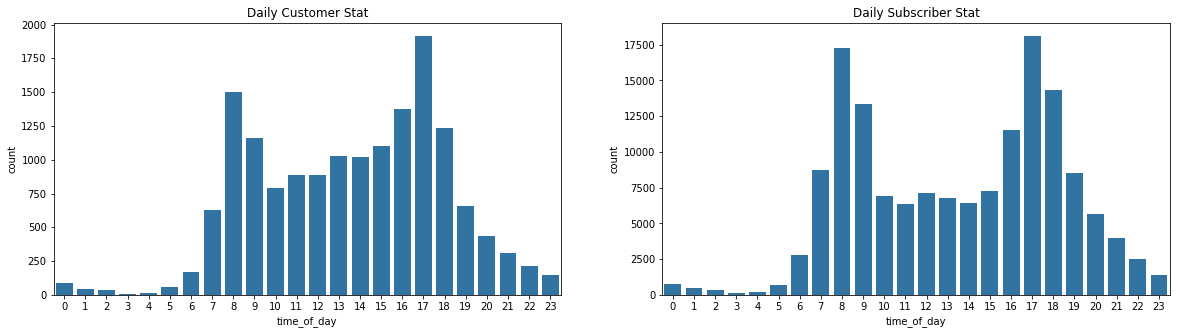

In [94]:
customers = ford_gobike_clean[ford_gobike_clean['user_type'] == 'Customer']
subscribers = ford_gobike_clean[ford_gobike_clean['user_type'] == 'Subscriber']

plt.figure(figsize=[20, 5])

plt.subplot(1,2,1)
sns.countplot(data=customers, x='time_of_day', color=base_color);
plt.title('Daily Customer Stat')

plt.subplot(1,2,2)
sns.countplot(data=subscribers, x='time_of_day', color=base_color);
plt.title('Daily Subscriber Stat');

The plots above does reveal that Subscribers use the service more at rush hours (7-9am and 4-6pm) as compared to Customers. This will likely indicate that Subscribers use the service as their major means of commuting possibly to work or school.

### Does the Ride Duration Decrease with an Increase in the Rider's Age?

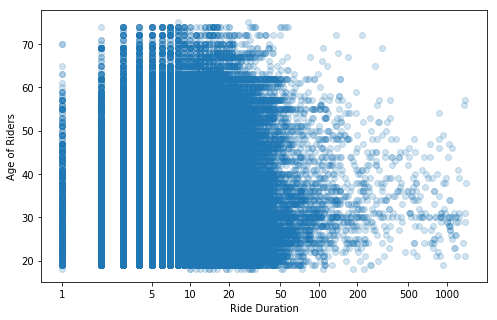

In [95]:
plt.figure(figsize=[8,5])
y=ford_gobike_clean['riders_age']
x=np.log10(ford_gobike_clean['ride_duration'])

plt.scatter(x, y, alpha=0.2);
ticks = np.log10([1, 5, 10, 20, 50, 100, 200, 500, 1000])
labels = ['1', '5', '10', '20', '50', '100', '200', '500', '1000']
plt.xticks(ticks, labels);
plt.ylabel("Age of Riders")
plt.xlabel('Ride Duration');

Ride duration tend to reduce as age or riders increases. However, the negative correlation tends to be more pronounced as the ride duration exceeded 20 minutes and the age of Rider approaches 50.

### What is the Relationship Between Gender and Ride Duration?

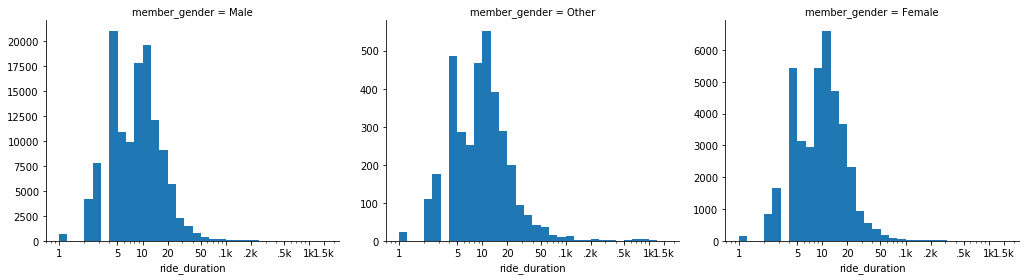

In [96]:
bins = 10**np.arange(0, 3.12+0.1, 0.1)
g = sns.FacetGrid(data=ford_gobike_clean, col='member_gender', size=4, aspect=1.2, col_wrap=3, sharey=False)
g.map(plt.hist, 'ride_duration', bins=bins);
plt.xscale('log');
ticklocs = [1, 5, 10, 20, 50, 100, 200, 500, 1000, 1500]
ticklabels = ['1','5', '10', '20', '50', '.1k', '.2k', '.5k', '1k', '1.5k']
plt.xticks(ticklocs, ticklabels);

The distribution seem to follow tthe same trend. There is no significant difference in the ride duration as a result of the differences in gender.

### What Relationship Exists Between Gender of Rider and User Type?

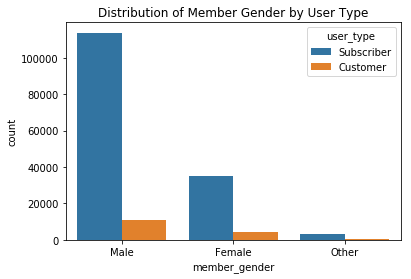

In [97]:
sns.countplot(data=ford_gobike_clean, x='member_gender', hue='user_type', order=['Male', 'Female', 'Other']);
plt.title('Distribution of Member Gender by User Type');

Obviously there are more males than females. It will be okay if we can see how user type relate with gender based on the proportion of each gender type.

In [98]:
# Create a copy of the dataframe
# Change the dtype of user_type to string so that pivoting and reset_index will work properly

ford_gobike_temp = ford_gobike_clean.copy()
ford_gobike_temp['user_type'] = ford_gobike_temp['user_type'].astype(str)

In [99]:
stats = ford_gobike_temp.groupby(['member_gender', 'user_type']).size().reset_index(name='count')
stats = stats.pivot(index='member_gender', columns='user_type', values='count')
stats = stats.reset_index()

In [100]:
stats['customer_ratio'] = stats['Customer'] / stats['Customer'].sum()
stats['subscriber_ratio'] = stats['Subscriber'] / stats['Subscriber'].sum()
stats

user_type,member_gender,Customer,Subscriber,customer_ratio,subscriber_ratio
0,Female,4391,34875,0.279308,0.229890
1,Male,10902,113716,0.693467,0.749596
2,Other,428,3112,0.027225,0.020514


In [101]:
stats['customer_ratio'].sum(), stats['subscriber_ratio'].sum()

(1.0, 1.0)

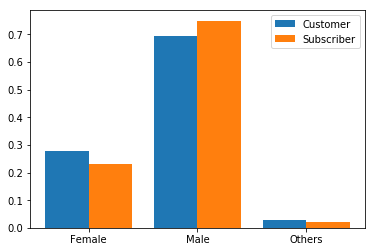

In [102]:
x = np.arange(len(stats))
width = .4

x_labels = ['Female', 'Male', 'Others']

y1 = stats['customer_ratio']
y2 = stats['subscriber_ratio']

plt.bar(x-0.2, y1, width, label='Customer')
plt.bar(x+0.2, y2, width, label='Subscriber')
plt.legend()
plt.xticks(x, x_labels);

Quite interesting. We can see that there are more female Customers than Subscriber. The reverse is true for males.

### How Does Being Enrolled in the Bike Share For All Program Compare With Being a Subscriber?

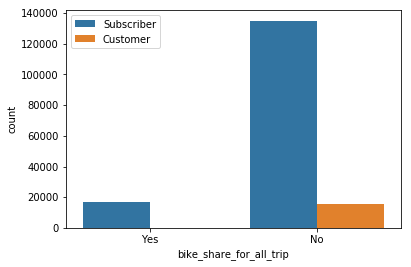

In [103]:
sns.countplot(data=ford_gobike_clean, x='bike_share_for_all_trip', hue='user_type');
plt.legend(loc='upper left');

We can see that Subscribers are the only people who made bike_share_for_all_trips and there are more trips involving Subscribers that are not bike_share_for_all_trips.

What effect does this have on ride duration?

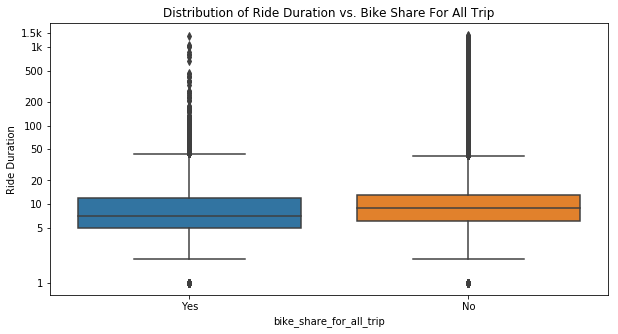

In [104]:
plt.figure(figsize=[10,5])
sns.boxplot(data=ford_gobike_clean, x='bike_share_for_all_trip', y='ride_duration_log');
plt.yticks(log_ticks, log_labels);
plt.title('Distribution of Ride Duration vs. Bike Share For All Trip');
plt.ylabel('Ride Duration');

Ride duration for bike_share_for_all_trips are lower than those that are not.

### Key Observations on the mainFeature of Interest

> First, as opposed to what we saw in the univariate visualization, I actually discovered that mean ride duration is significantly higher at weekends than weekdays.

> In the univariate exploration, we did observe that Customers use the service for longer periods that Subscribers. The same trend is observed in the Bivariate exploration. We saw that the mean ride duration for Subscribers is a little above 10 minutes. Customers, however, have a mean ride duration of above 20 minutes.

> We observed that more people use the bike share service on weekdays than weekends. That trend is not absolute for Customers. The weekend usage is actually higher than some weekdays for Customers. We also discovered that with the exception of Thursday, Customer usage is almost similar for everyday.

> The mean ride duration tend to be the same for just every time of the day.


### Other Interesting Relationships Between the Other Features 

> I discovered that ride duration decreased an age of riders increased.

> There is no significant effect on the ride duration as a result of differences in gender.

> The number of Customers using the service at so-called rush hours are significantly lower that Subscribers using it at the same time. In addition, Customers tend to have fair amount of usage between 11 am and 3 pm where the Subscriber usage is significantly low. 

## Multivariate Exploration

### How Does Active Customer Hours and Days Compare with Subscribers?

It's a good idea to visualize how the ative hours and days of Customers compare with those of Subscribers. With this, we can add the ride duration component to the plot for a wholistic comparison.

In [105]:
customers_df = ford_gobike_clean[ford_gobike_clean['user_type'] == 'Customer']  # Get a dataframe of only customers
subscribers_df = ford_gobike_clean[ford_gobike_clean['user_type'] == 'Subscriber']# Get a dataframe of only subscribers

cust_stats = customers_df.groupby(['start_weekday', 'time_of_day']).size().reset_index(name='count')
cust_stats = cust_stats.pivot(columns='time_of_day', index='start_weekday', values='count')

sub_stats = subscribers_df.groupby(['start_weekday', 'time_of_day']).size().reset_index(name='count')
sub_stats = sub_stats.pivot(columns='time_of_day', index='start_weekday', values='count')

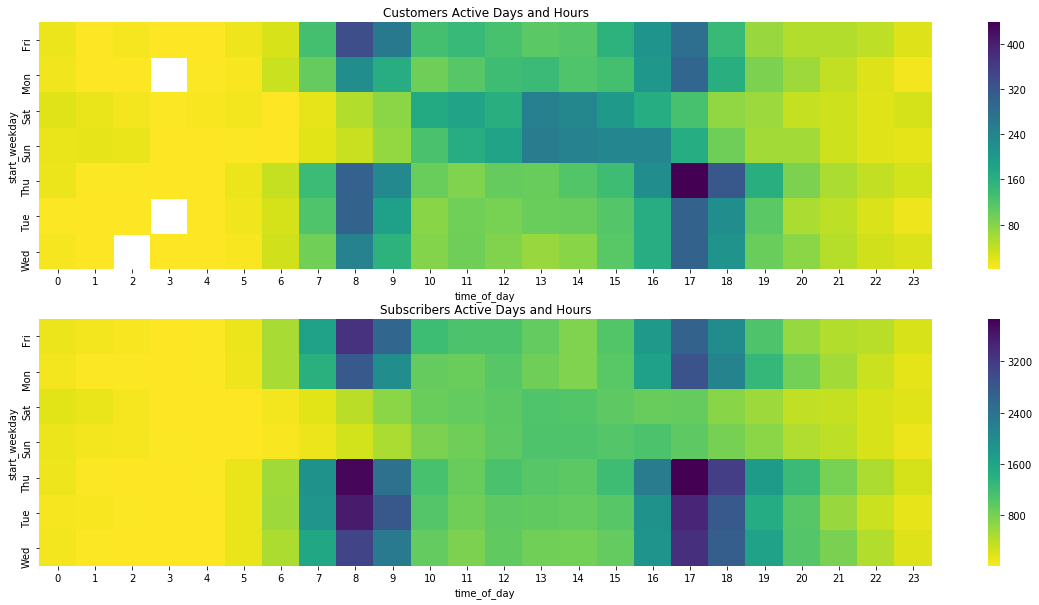

In [106]:
plt.figure(figsize = [20,10])

plt.subplot(2,1,1)
sns.heatmap(cust_stats, cmap='viridis_r');
plt.title('Customers Active Days and Hours')

plt.subplot(2,1,2)
sns.heatmap(sub_stats, cmap='viridis_r');
plt.title('Subscribers Active Days and Hours');

In [107]:
# Get total mean ride duration, as well as mean ride duration for subscribers and customers only

total_mean_ride_duration = ford_gobike_clean.groupby(['start_weekday', 'time_of_day'])['ride_duration'].mean().unstack().fillna(0)
customer_mean_ride_duration = customers_df.groupby(['start_weekday', 'time_of_day'])['ride_duration'].mean().unstack().fillna(0)
subscriber_mean_ride_duration = subscribers_df.groupby(['start_weekday', 'time_of_day'])['ride_duration'].mean().unstack().fillna(0)

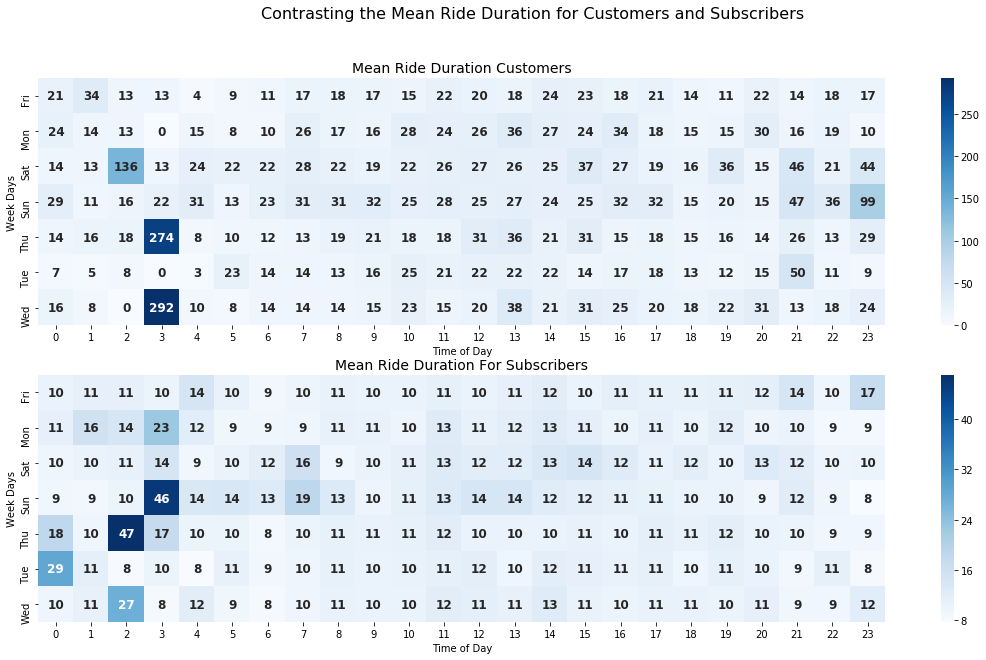

In [108]:
plt.figure(figsize=[20,10])

plt.subplot(2,1,1)
sns.heatmap(customer_mean_ride_duration, cmap='Blues', annot=True, fmt='.0f', annot_kws={'fontsize':12, 'fontweight':'bold'},
           square=True, linecolor='k')
plt.title('Mean Ride Duration Customers', fontsize=14)
plt.xlabel('Time of Day')
plt.ylabel('Week Days')

plt.subplot(2,1,2)
sns.heatmap(subscriber_mean_ride_duration, cmap='Blues', annot=True, fmt='.0f', 
            annot_kws={'fontsize':12, 'fontweight':'bold'},  square=True, linecolor='k');
plt.title('Mean Ride Duration For Subscribers', fontsize=14)
plt.xlabel('Time of Day')
plt.ylabel('Week Days')
plt.suptitle('Contrasting the Mean Ride Duration for Customers and Subscribers', fontsize=16);

The heatmaps above shows the same information that we have already known from our bivariate exploration, only that this time we have another view of the data.

Just to reiterate, we can see that for Subscribers, the most active days are weekdays and they are mostly active during the rush hours especially 8am and 5pm. We can safely say that this group of people represent those using the service as their primary means of transportation. Customers on the other hand are active users of the service all week round, only they are not as much as Subscribers. 

Also, Customers appear to use the service pretty much on weekends, thus confirming our hypothesis that this group of people represent Recreational Cyclists. They have the longest ride durations and do not have any particular active or rush hours.

How does the ride duration impact this ride behaviour exhibited by Customers and Subscribers?

### What is the Average Ride Duration by Day of the Week and User Type?

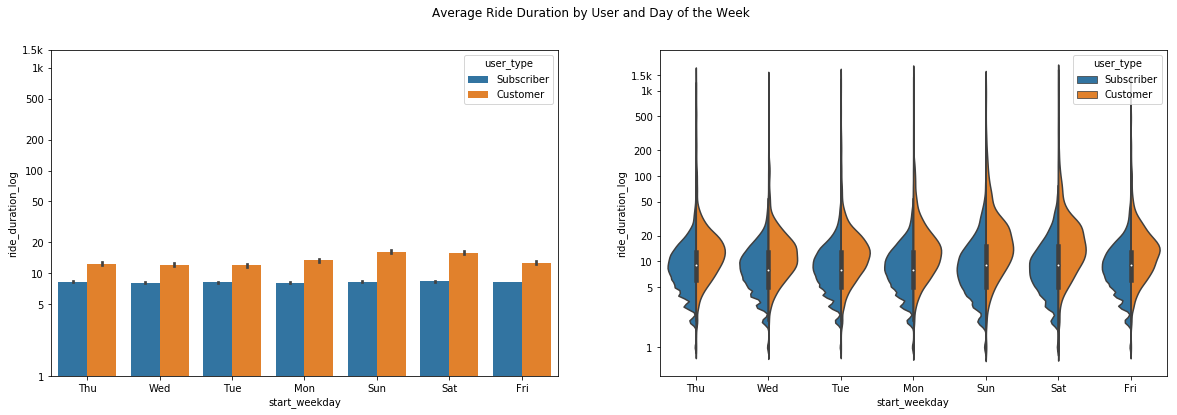

In [109]:
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
sns.barplot(data=ford_gobike_clean, x='start_weekday', y='ride_duration_log', hue='user_type');
plt.yticks(log_ticks, log_labels)

plt.subplot(1,2,2)
sns.violinplot(data=ford_gobike_clean, x='start_weekday', y='ride_duration_log', hue='user_type', split=True);
plt.suptitle('Average Ride Duration by User and Day of the Week');
plt.yticks(log_ticks, log_labels);

We observe that the same trend in the Bivariate exploration persists. The average ride duration of Subscribers is approximately the same for everyday in the week, weekend inclusive and that's around 8 to 10 minutes. However, the average ride duration for Customers is approximately 13 to 20 minutes. The average ride duration for Customers at weekends double the average ride duration for Subscribers.

It will make perfect sence to see how this trend play out on hourly basis too. Let's see what the mean ride duration for looks like for all user types on hourly and daily basis.

### Is the Mean Ride Duration Affected by User type Accross  Different Time of Day?

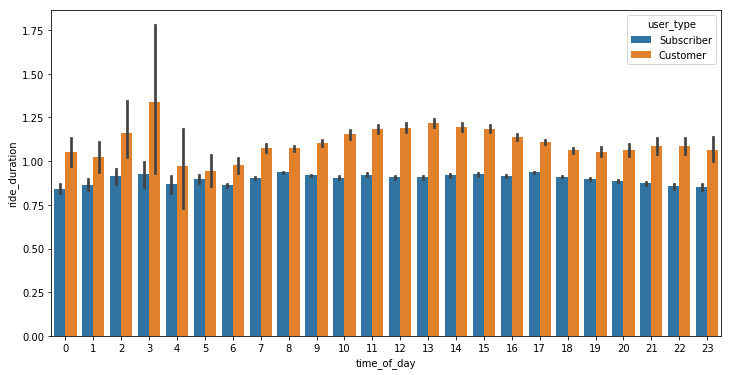

In [110]:
plt.figure(figsize=[12,6])

sns.barplot(data=ford_gobike_clean, x='time_of_day', y=np.log10(ford_gobike_clean['ride_duration']), hue='user_type');

In the univariate exploration of the time of the day, we discovered that the count of people using the service followed a particular pattern. There are peak hours (7am - 9am & 4pm - 7pm). The number of rides at these hours were significantly higher than other times of the day. This pattern was the same for both Subscribers and Customers with relatively few variations. However, when we explored the relationship between the time of the day and the mean ride duration, we see that the mean ride duration is almost the same irrespective of the time of the day.

In this multivariate exploration, we observe a similar but subtle difference in the distribution. The mean ride duration for Subscribers is almost constant throughout each day as we have previously observed above. The mean ride duration for Customers, on the other hand, is much higher that that of Subscribers but with very slight variations. Also observe that the peak hours, which is accounted for by the count of rides in each hour seems to disappear, leaving us with relatively equal mean ride duration for Customers and Subscribers.

Let us examine this relationships once more by exploring the relationship between mean ride duration, user type, day of the week and time of the day.

### Whai is the Average Ride Duration for the  User Types by Time of Day and Day of Week

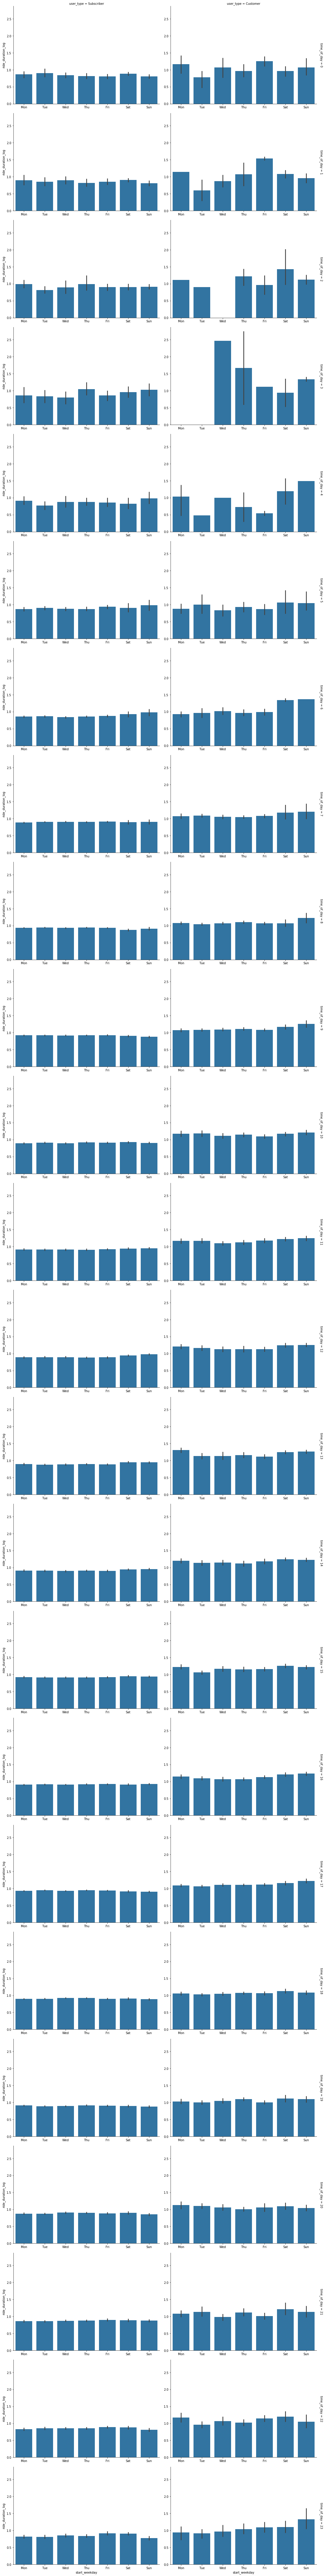

In [111]:
g = sns.FacetGrid(data=ford_gobike_clean, row='time_of_day', col='user_type', margin_titles=True,
                  size=5, aspect=1.5)
g.map(sns.barplot, 'start_weekday', 'ride_duration_log', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);

The FacetGrid above confirms and summarizes all our observations so far. The average ride duration for Subscribers tend to be uniform, with very little variations for every hour and for every single day and are lower than the average ride duration for Customers. More of a stereotypical behaviour.

On the other hand, the ride duration for Customers for each hour and each day tend to fluctuate but are obviously higher at weekends.

### Distribution of Ride Duration by User Type and Bike Share For All Trip

In [112]:
ford_gobike_clean.groupby(['user_type', 'bike_share_for_all_trip'])['ride_duration'].mean()

user_type   bike_share_for_all_trip
Subscriber  Yes                        11.569017
            No                         10.730419
Customer    No                         21.394949
Name: ride_duration, dtype: float64

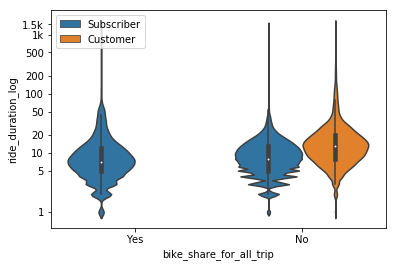

In [113]:
sns.violinplot(data=ford_gobike_clean, x='bike_share_for_all_trip', y='ride_duration_log',
              hue='user_type');
plt.yticks(log_ticks, log_labels);
plt.legend(loc='upper left');

The violinplot above show that Customers rarely subscribe to the bike share for all program, hence, there are no enteries for Customers who are subscribed to the program. On the other hand, we see that the mean ride duration for Subscribers who are also subscribed to the bike share for all program is lower than those who are not.

### What is the Average Ride Duration by Day of the Week Ordered by Gender of Users?

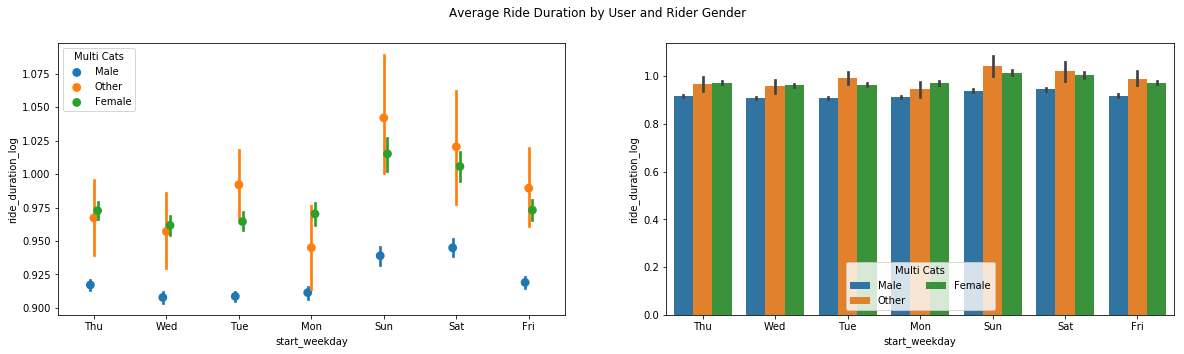

In [114]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
sns.pointplot(data=ford_gobike_clean, x='start_weekday', y='ride_duration_log', hue='member_gender', linestyles="", dodge=.1);
plt.legend(loc=2, ncol=1, title='Multi Cats');

plt.subplot(1,2,2)
sns.barplot(data=ford_gobike_clean, x='start_weekday', y='ride_duration_log', hue='member_gender');
plt.legend(loc=8, ncol=2, title='Multi Cats');
plt.suptitle('Average Ride Duration by User and Rider Gender');

In [115]:
print(f'Minimum Ride Duration for Male Riders: {log_transform(0.9, inverse=True)}')
print(f'Maximum Ride Duration for Male Riders: {log_transform(0.950, inverse=True)}')
print(f'Minimum Ride Duration for Female Riders: {log_transform(0.965, inverse=True)}')
print(f'Maximum Ride Duration for Female Riders: {log_transform(1.025, inverse=True)}')

Minimum Ride Duration for Male Riders: 7.943282347242816
Maximum Ride Duration for Male Riders: 8.912509381337454
Minimum Ride Duration for Female Riders: 9.22571427154763
Maximum Ride Duration for Female Riders: 10.592537251772887


In the univariate exploration, we saw that there are more count of males than females. In the bivariate exploration we then observed that more males are subscribed to the service while more females used the service as Customers.

Here, it turns out that the ride duration for male folks is significantly lower than ride duration for females. Although we also observe that the category, other (which represents those whose sex we do not know), is higher that both sexes. 

### How is the Mean Ride Duration Distributed by Gender of User and the Day of the Week ?

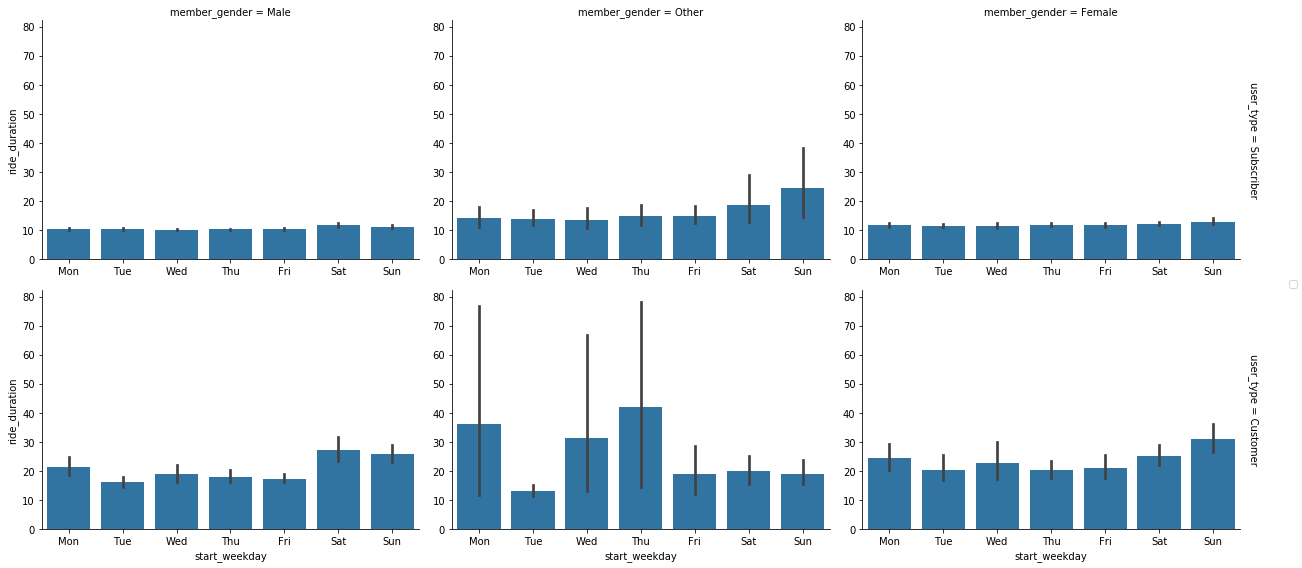

In [116]:
g = sns.FacetGrid(data=ford_gobike_clean, row='user_type', col='member_gender',  margin_titles=True, size=4, aspect=1.5) 
g.map(sns.barplot, 'start_weekday', 'ride_duration', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);
g.add_legend();

From the plot above, we can see that the mean ride duration for Subscribers is fairly the same (uniform) for everyday in the week irrespective of the sex. However, the mean ride duration for Customers is fairly higher than Subscribers as we saw in the univariate and bivariate plots above. More interestingly, we can affirm that the mean ride duration for Customers is higher at weekends as our bivariate plot showed.

### Does Being Enrolled in the  Bike Share For All Program Increase the Mean Ride Duration Accross Days of the Week? 

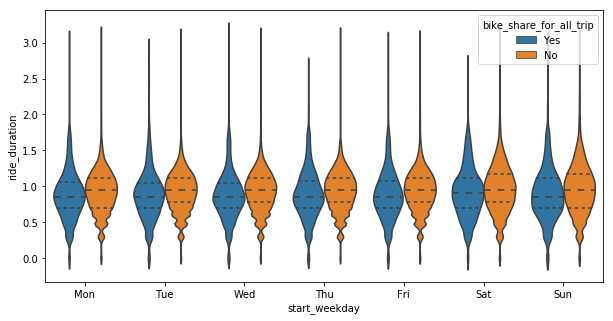

In [117]:
plt.figure(figsize=[10,5])
sns.violinplot(data=ford_gobike_clean, x='start_weekday', y=np.log10(ford_gobike_clean['ride_duration']), 
      hue='bike_share_for_all_trip', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
              inner='quartile');

The mean ride duration does not appear to be affected by being enrolled in the Bike Share For All Program accross each day of the week. Let's view the relationship from a different perspective.

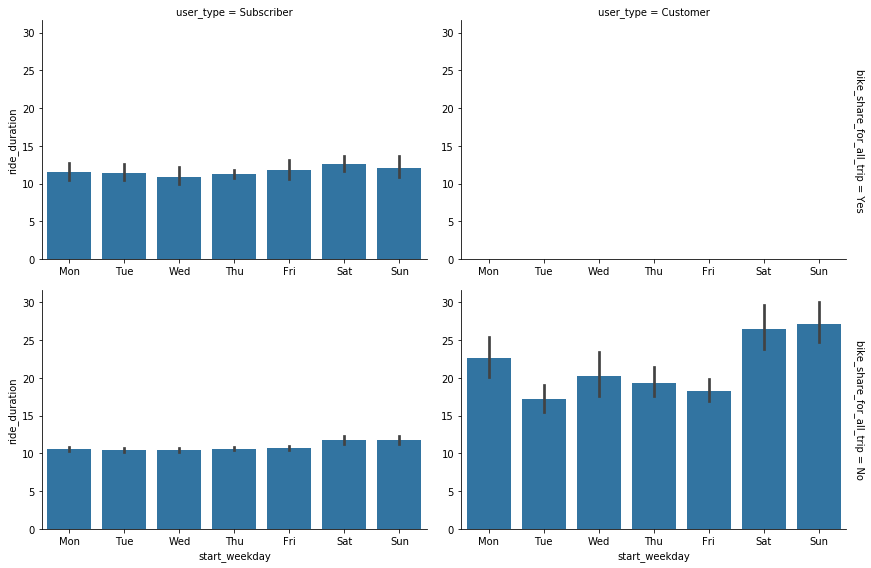

In [118]:
g = sns.FacetGrid(data=ford_gobike_clean, col='user_type', row='bike_share_for_all_trip', margin_titles=True, size=4, 
                  aspect=1.5)
g.map(sns.barplot, 'start_weekday', 'ride_duration', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);

For Subscribers, there is not much difference in the mean ride duration whether the trip is a bike share for all trip or otherwise. The trend is almost the same with the mean ride duration higher on weekends as we saw in our bivariate exploration. There are no Customers subscribed to the bike share for all program, and the mean ride duration for Customers is higher at weekends than weekdays as we have also seen. 

### Distribution of Ride Duration and Age of Riders and Day of the Week

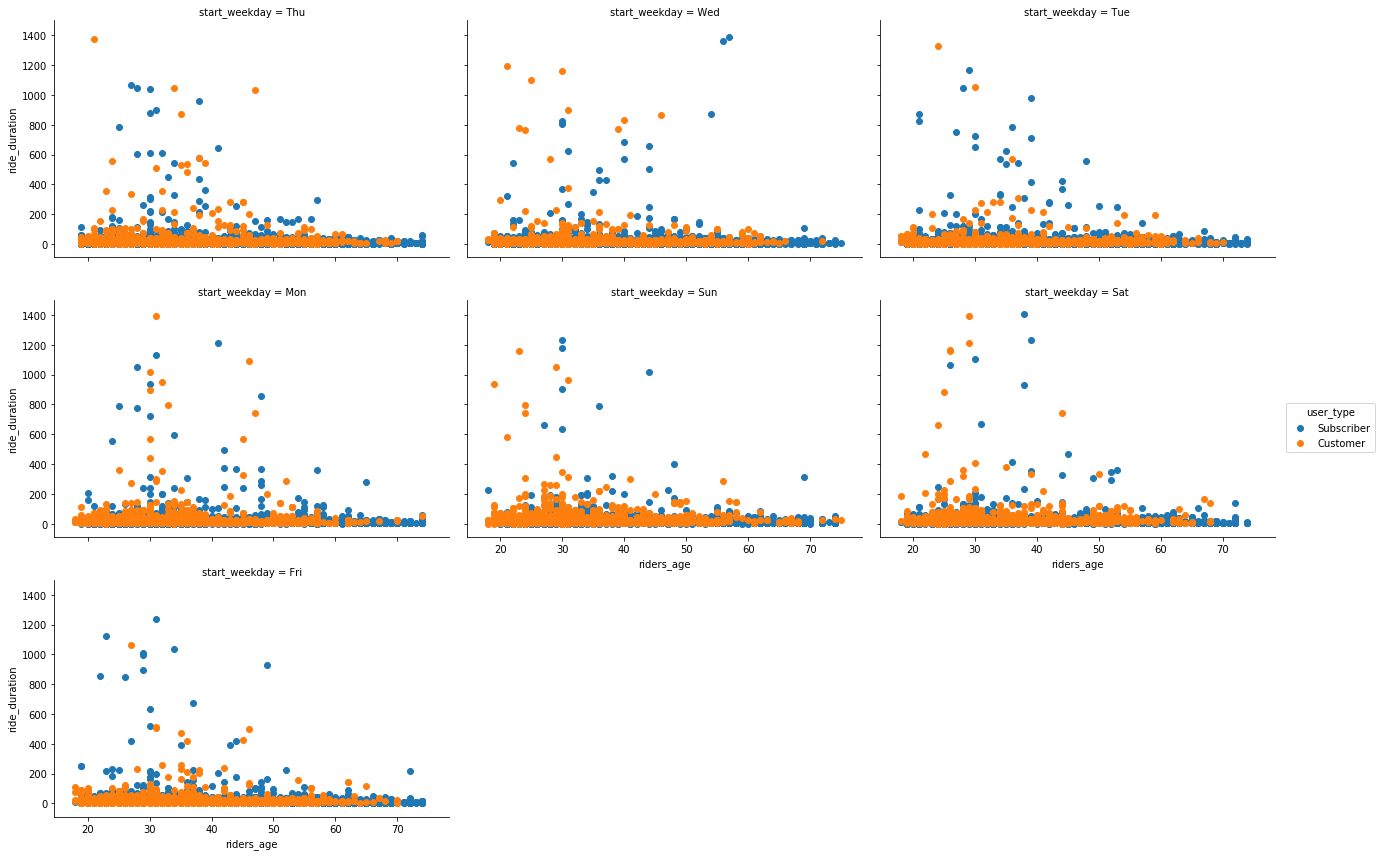

In [119]:
g = sns.FacetGrid(data=ford_gobike_clean, col='start_weekday', hue='user_type', size=4, aspect=1.5, col_wrap=3)
g.map(plt.scatter, 'riders_age', 'ride_duration');
g.add_legend();

The scatter plot for all the days of the week appear pretty similar, and thus suggests a similar trend all week round. As observed in the bivariate exploration of age and ride duration, we observe here also that irrespective of the user type, ride duration decreases as the age of the Rider increases.

### Commuters or Recreational Cyclists?

It is not unlikely, though also not common to find Commuters that will use a bike share service for trips of over an hour. Such a Commuter is almost certainly better off using some other means of transportation. 

Now, if we assume that a trip of over an hour is like a recreational Cyclist or a Tourist, it will mean that most people that uses the service for longer durations are Recreational Cyclists or Tourists. Let's view the proportion of Commuters to Recreational Cyclists and/or Tourists.

In [120]:
cyclists = ford_gobike_clean.query('ride_duration > 60')
cyclists.groupby('user_type')['ride_duration'].mean()

user_type
Subscriber    206.182493
Customer      183.825806
Name: ride_duration, dtype: float64

In [121]:
cyclists.groupby('user_type')['ride_duration'].size()

user_type
Subscriber    674
Customer      620
Name: ride_duration, dtype: int64

Even though there are roughly 10x more Subscribers than Customers, we can see from the cells above that majority of people using the service for more than an hour must be using it for either tourist purposes or recreationalactivities or plain fun, rather than as a means for commutting.

Let's see this in a chart.

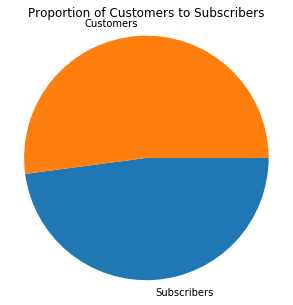

In [122]:
# Plot the proportion of Customers to Subscribers in a pie chart
customer_count = cyclists.query('user_type == "Customer"')['ride_duration'].count()
subscriber_count = cyclists.query('user_type == "Subscriber"')['ride_duration'].count()
customer_prop = (customer_count/cyclists['ride_duration'].count()) *100
subscriber_prop = (subscriber_count/cyclists['ride_duration'].count()) *100

plt.figure(figsize=[10, 5])
labels = ['Subscribers', 'Customers']

plt.pie([customer_prop, subscriber_prop], labels=labels, counterclock=False)
plt.title('Proportion of Customers to Subscribers')
plt.axis('square');

Obviously, majority of the Customers are using the service as either Tourists or for recreational purposes, as opposed to Subscribers who use it for commutting.

### Final Observations

> Mean ride duration for Subscribers is almost uniform for weekdays and are lower on weekends, on the other hand, mean ride duration for Customers is not constant but obviously higher at weekends. 

> The main feature that affect the ride duration is the status of the user. We observed that Customers have far longer mean ride duration that Subscribers.

### Interesting  Interactions Between Features

> The high number of trips by customers for each day did not make the mean ride duration for Subscribers higher, on the contrary, mean ride duration is higher for Customers.

> More males are subscribed to the service and most trips are not bike share for all trip considering the high amount of people who are subscribed to the program.

## Conclusions

> 1. Some trips are short and last for about a minute, some are very long lasting more than 1400 minutes.
     The majority of the trips in the dataset are between 4 to 30 minutes. Short trips are mostly
     trips that involves Subscribers. Subscribers typically use the service for commutting purposes. The mean
     ride duration for Subscribers is around 10 minutes. Customers have more than 2x of that. Customers could 
     represent Tourists or simply Recreational Cyclists or even those using the service for fun and exercise

> 2. The top start stations are also the top end station. Same with the bottom start and end stations.
     This trend indicates the fact that most trips are used for commutting purposes and for convenience.

> 3. There are about 10x more Subscribers using the service in February 2019 as Customers. Subscribers are 
     Customers that pay a monthly or yearly subscription fee to use the service. Customers are pay as you
     go users that pay for every trip.

> 4. Number of males using the service is about 3x more than the population of females using the service. There
    are more females subscribed to the service, however, than males.

> 5. Users of bike share services may choose to enrol in the Bike Share For All Program. This program offers bike
     sharing services to low income earners at affordable rates. A trip could be a bike share for all trip
     meaning that the trip is at a lower price or discounted. Our data shows that more 7x more people
     do not care to subscribe for the service. The mean ride duration for Subscribers to the Bike Share For All 
     Program is lower than those who are not subscribed to the program. 

> 6. weekdays typically record the highest amount of trips with some days of the week recording over 32,000 trips.
     weekends on the other hand have low number of trip, fewer than 15,000. Subscribers use the service typically
     for commutting on weekdays. Our data shows that Customers use the service more on weekends. In addition, it is 
     observed that the mean ride duration for females is higher than males for everyday of the week.

> 7. The number of trips vary with time. Our data shows that for weekdays, 7am to 9am are rush hours as are 4pm to 7pm
     There a spike in the number of trips averaging about 40,000 to 45,000 trips at these periods. 
     This point to the fact that majority of the users use the service for commutting purposes and for convenience.

> 8. Majority of the users are between the ages of 20 and 50 years. We expect ride duration to decrease as the age
    of the Rider increases. This holds true for our data.